# Linear Regression 

In [2]:
import numpy as np 
from matplotlib import pyplot as plt
from numpy import genfromtxt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

### Firstly, we'll define the main three equations of linear regression,  we must use to complete the exercise:


### 1- Hypothesis
 *The hypothesis function of linear regression describes by the equation: *
> h($\theta$) = $\theta^T$ * X

    

In [3]:
def hypothesis(x, theta):
    return np.dot(x,theta)

### 2- Cost Function 
We use the cost function to measure the accuracy of our hypothesis through seeing the difference between our result and the target. 
So, we can describe the cost function by: 

> $ J(\theta)= \frac{1}{2m} \sum_{i=1}^{m} (h(\theta)^i- y^i)$


In [4]:
def costFunction(x,theta, y):
    m = y.shape[0]
    h = np.dot(x, theta)
    error= h-y
    J = 1/(2*m)*np.sum(np.square(error))
    return J
    

### 3- Gradient Decsent 
We Always need to fit the parameters of hypothesis equation, till we minimize the cost to the lowest value, to increase the accuracy of our model. for this prupose, we used Gradinet decsent equation, which describe by: 

**repeat** {

> $ \theta_i:= \theta_i - \frac{1}{m} \sum_{i=1}^{m} J(\theta_0 , \theta_0 ) $

}

In [5]:
def gradientDescent(x, theta, y, alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in range(num_iters):
        h = np.dot(x,theta)
        for j in range (len(theta)):
            theta[j] = theta[j] - (alpha/m)*(np.dot(x[:,j],(h-y)))
            
        J_history[iter] = costFunction(x, theta, y)
    return(theta, J_history)

### a- Linear regression, One feature

In this exercise, we will implement linear regression with one variable to predict profits for a food truck.
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [6]:
data = genfromtxt('Datasets/ex1data1.txt',delimiter=',')

##### Now, we'll display the data, to make sure that linear regression is convenient option 

Text(0.5,0,'Population of City in 10,000s')

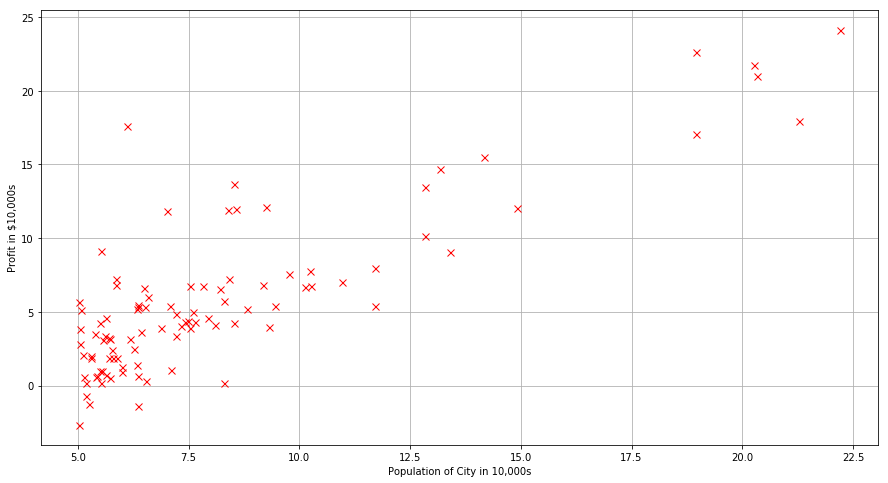

In [7]:
plt.figure(figsize=(15,8))
plt.plot(data[:,0],data[:,1],'rx',markersize=7)
plt.grid(True) 
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [100]:
X= np.array([np.ones(data.shape[0]), data[:,0]]).T # add a column of ones to the x 
theta= np.zeros([2,1]) 
y = np.array([data[:,1]]).T #Target

In [101]:
# here's the cost value just before fitting the parameters
cost_before = costFunction(X,theta, y)
print (cost_before)

32.072733877455676


In [102]:
[theta_new, cost_hist] = gradientDescent(X, theta, y, alpha=0.01, num_iters=1500)

#### to make sure that the parameters fitted correctly, we must see if the cost value has decreased with each iteration

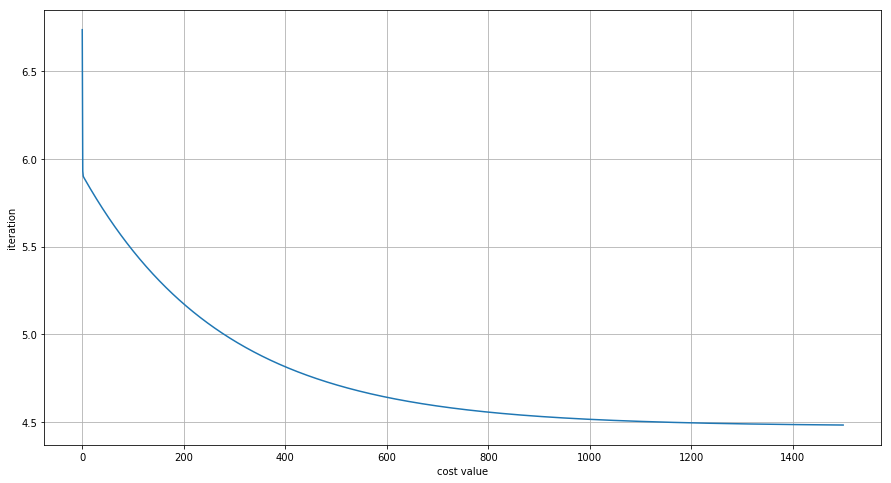

In [103]:
plt.figure(figsize=(15,8))
plt.grid(True) 
plt.ylabel('iteration')
plt.xlabel('cost value')
plt.plot(cost_hist)


#### Now, we'll display the line that discribe our data

In [104]:
def line(theta,x):
    return theta[0]+theta[1]*x

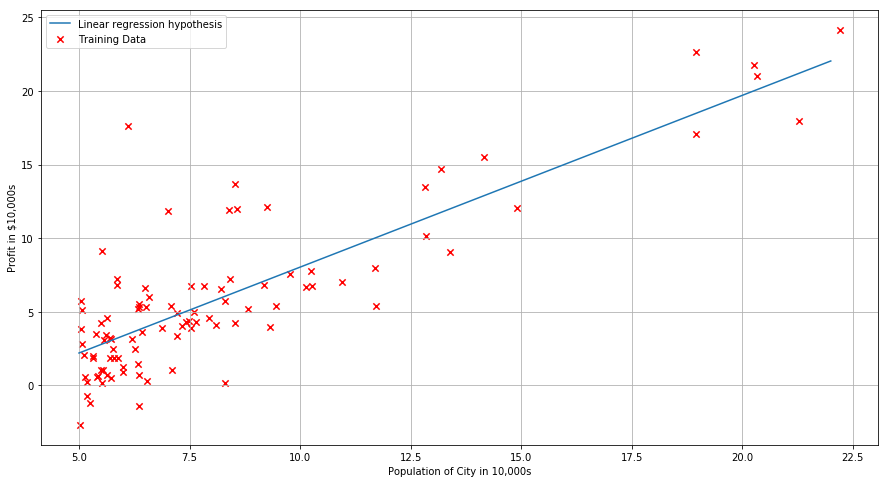

In [105]:
x_regression = np.arange(5,23)
y_regression = line(theta_new,x_regression)

plt.figure(figsize=(15,8))
plt.grid(True) 
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.scatter(X[:,1], y, s=40, c='r', marker='x', linewidths=1, label='Training Data')
plt.plot(x_regression,y_regression, label='Linear regression hypothesis' )
plt.legend()

In [106]:
#Practice 
print('profit for a city with population of 150000 is ',theta_new.T.dot([1, 15])*10000)
print('profit for a city with population of 75000 is',theta_new.T.dot([1, 7.5])*10000)

profit for a city with population of 150000 is  [138651.43815629]
profit for a city with population of 75000 is [51174.26188113]


### J( $\theta $) on the space 

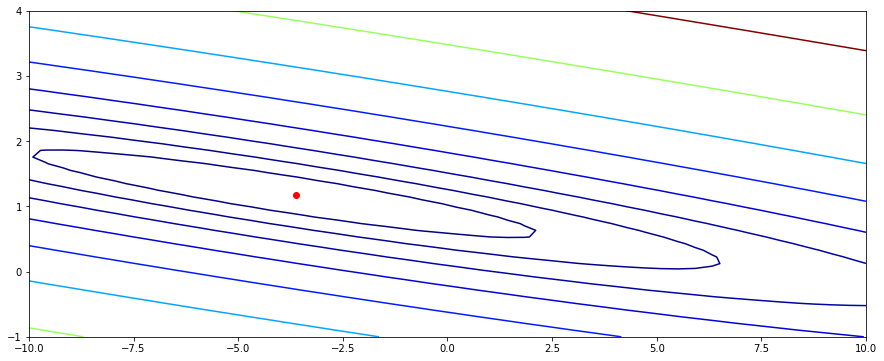

In [107]:
theta0 = np.linspace(-10, 10, 50)
theta1 = np.linspace(-1, 4, 50)
xa, ya = np.meshgrid(theta0, theta1, indexing='xy')
Z = np.zeros((theta0.size,theta1.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = costFunction(X,[[xa[i,j]], [ya[i,j]]],y)
    
fig1 = plt.figure(figsize=(15,6))

CS = plt.contour(xa, ya, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
plt.scatter(theta[0],theta[1], c='r')

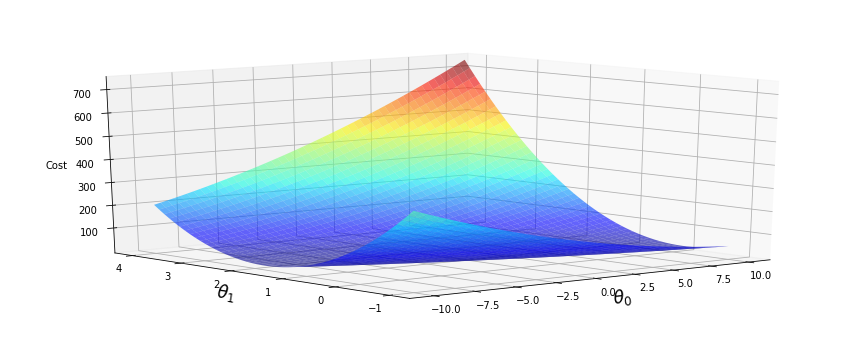

In [108]:
fig = plt.figure(figsize=(15,6))
ax= fig.add_subplot(111, projection='3d')
ax.plot_surface(xa, ya, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax.set_zlabel('Cost')
ax.set_zlim(Z.min(),Z.max())
ax.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

### b- Linear regression with multi features

In this part, we will implement linear regression with multiple variables to
predict the prices of houses.

The data contains a training set of housing prices in Port-land, Oregon. 
- The first column is the size of the house (in square feet)
- the second column is the number of bedrooms, and the third column is the price of the house.

In [109]:
data_multi= genfromtxt('Datasets/ex1data2.txt',delimiter=',')

Text(0.5,0,'Size of the house')

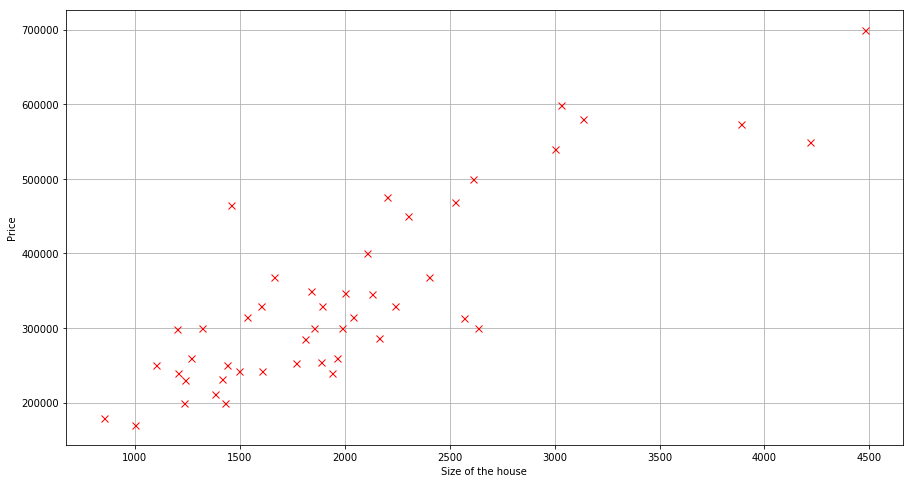

In [141]:
plt.figure(figsize=(15,8))
plt.plot(data_multi[:,0],data_multi[:,2],'rx',markersize=7)
plt.grid(True) 
plt.ylabel('Price')
plt.xlabel('Size of the house')

Text(0.5,0,'Number of rooms')

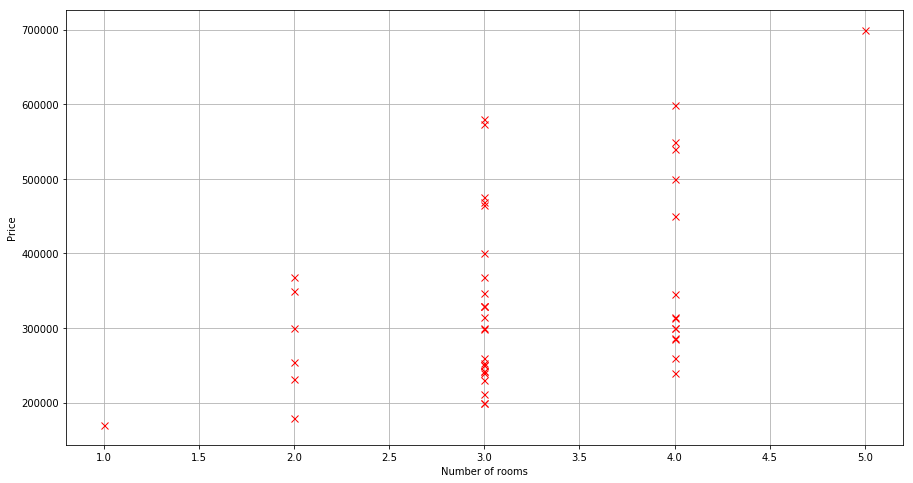

In [142]:
plt.figure(figsize=(15,8))
plt.plot(data_multi[:,1],data_multi[:,2],'rx',markersize=7)
plt.grid(True) 
plt.ylabel('Price')
plt.xlabel('Number of rooms')

In [110]:
data_multi = data_multi
X_multi = np.array(data_multi[:,0:2])
X_multi = np.insert(X_multi,0,1,axis=1)

theta_multi= np.zeros([3,1])
y_multi= np.array([data_multi[:,2]])

#### obviously, the difference between the range of two features are really huge, so, we need to normalize the data

In [111]:
pd.DataFrame(X_multi[1:10,:])

,0,1,2
0,1.0,1600.0,3.0
1,1.0,2400.0,3.0
2,1.0,1416.0,2.0
3,1.0,3000.0,4.0
4,1.0,1985.0,4.0
5,1.0,1534.0,3.0
6,1.0,1427.0,3.0
7,1.0,1380.0,3.0
8,1.0,1494.0,3.0


In [112]:
def normalize(x):
    
    mean = np.mean(x)
    std = np.std(x)
    
    for i in range (x.shape[0]):
        x[i]=(x[i] - mean)/std
        
    return x

In [113]:
X_multi[:,1]= normalize(X_multi[:,1])
X_multi[:,2]= normalize(X_multi[:,2])

In [114]:
# we can see now how the range differs
pd.DataFrame(X_multi[1:10,:])

,0,1,2
0,1.0,-0.509641,-0.226093
1,1.0,0.507909,-0.226093
2,1.0,-0.743677,-1.554392
3,1.0,1.271071,1.102205
4,1.0,-0.019945,1.102205
5,1.0,-0.593589,-0.226093
6,1.0,-0.729686,-0.226093
7,1.0,-0.789467,-0.226093
8,1.0,-0.644466,-0.226093


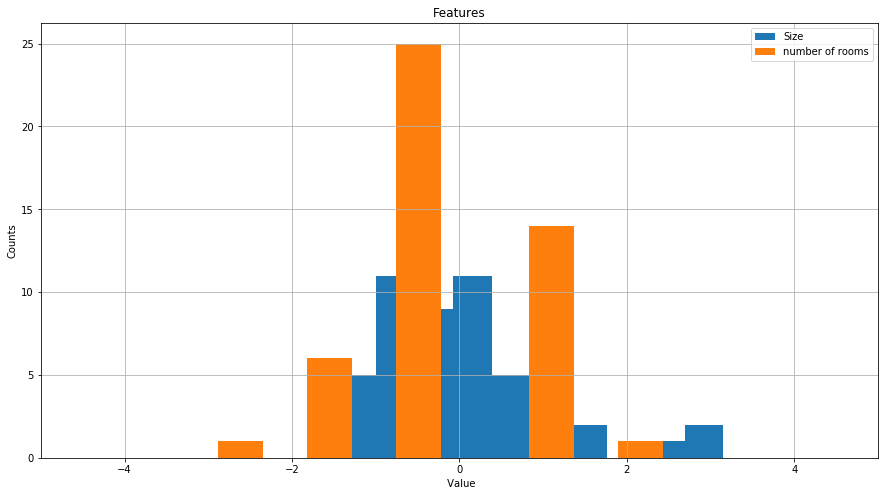

In [145]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(X_multi[:,1],label = 'Size')
dummy = plt.hist(X_multi[:,2],label = 'number of rooms')
plt.title('Features')
plt.xlabel(' Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [125]:
[theta_new_multi, cost_hist_multi] = gradientDescent(X_multi, theta_multi, y_multi.T, alpha=0.01, num_iters=1500)

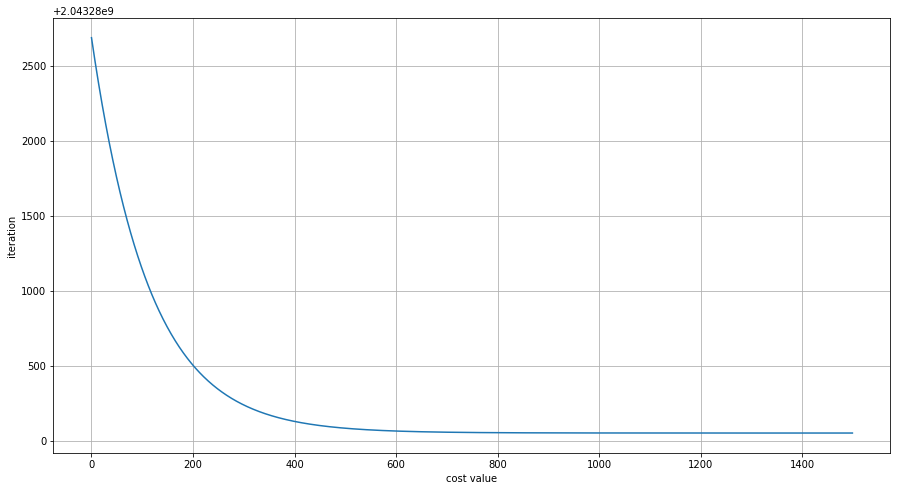

In [126]:
plt.figure(figsize=(15,8))
plt.grid(True) 
plt.ylabel('iteration')
plt.xlabel('cost value')
plt.plot(cost_hist_multi)

In [128]:
def line_multi(theta,x):
    h_multi=0
    for i in range(len(theta)):
        h_multi+= theta[i]*x[i]
    return h_multi

In [152]:
#Practice
line_multi(theta_new_multi, X_multi[1,:])

array([286120.96017233])